# Limpieza de datos

In [1]:
import pandas as pd 
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [2]:
path_data_test = '/Users/arnoldoleyson/Desktop/Ironhack/Projects/statistical-analysis-project/house-prices-advanced-regression-techniques/train.csv'
path_description = '/Users/arnoldoleyson/Desktop/Ironhack/Projects/statistical-analysis-project/house-prices-advanced-regression-techniques/data_description.txt'

In [3]:
#Revisamos el archivo donde viene la descripción de que es cada columna en nuestro dataset
archivo = open (path_description, 'r')
descripcion = archivo.read()
print(descripcion)
archivo.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
data = pd.read_csv(path_data_test, encoding='latin-1')

In [5]:
#Le damos un vistazo a la información!!
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Revisamos la forma en la que está presentada la información en cuando a filas y columnas
data.shape

(1460, 81)

In [7]:
#Revisamos de manera general las columnas, la info que tienen, el tipo de info, etc
data.info()

#Nos damos cuenta que hay muchos datos nulos en algunas columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Revisamos el nombre de las columnas del dataframe
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#Quitamos cualquier posible espacio que estuviera adicional en el nombre de las columnas.
data.columns = data.columns.str.strip()
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#Renombramos las columnas que inician con un número
data = data.rename(columns = {'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF', '3SsnPorch': 'ThirdSsnPorch'})
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [11]:
#Revisamos que columnas tengo con data nula (sin datos)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
FirstFlrSF          0
SecondFlrSF         0
LowQualFin

In [12]:
#Hacemos una revisión para que nos traiga las columnas que tenemos con el número de datos nulos de cada una.
columnas_nulas = data.isnull().sum()
columnas_nulas[columnas_nulas > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
#Revisamos el índice de las columnas con mas de 200 datos nulos.

#Primero vemos la forma original de nuestro data frame
print(data.shape)

#Definimos la variable columnas_a_eliminar para eliminar las columnas_nulas que tenían más de 1,000 datos nulos. 
columnas_a_eliminar = columnas_nulas[columnas_nulas>200].index

#Actualizamos nuestra data con un data.drop y seleccionamos que se quiten las columnas_a_eliminar del paso previo
data = data.drop(columnas_a_eliminar, axis = 1)
print(data.shape)

(1460, 81)
(1460, 75)


In [14]:
#Nuevamente revisamos las columnas nulas
columnas_nulas = data.isnull().sum()
columnas_nulas[columnas_nulas > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [15]:
#Revisamos la columna de MasVnrType: Masonry veneer type
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [16]:
#Los valores nulos de la columna MasVnrType los cambiamos por None
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [17]:
#Los valores nulos de la columna MasVnrArea: Masonry veneer area in square feet, los cambiamos por 0, ya que no tienen MasVnrType
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [18]:
#Revisamos la columna de BsmtQual: Evaluates the height of the basement
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [19]:
#Los valores nulos de la columna BsmtQual los cambiamos por NA, de que no tiene Basement
data['BsmtQual'] = data['BsmtQual'].fillna('NA')

In [20]:
#Revisamos la columna de BsmtCond: Evaluates the general condition of the basement
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [21]:
#Los valores nulos de la columna BsmtCond los cambiamos por NA, de que no tiene Basement
data['BsmtCond'] = data['BsmtCond'].fillna('NA')

In [22]:
#Revisamos la columna de BsmtExposure: Refers to walkout or garden level walls
data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [23]:
#Los valores nulos de la columna BsmtExposure los cambiamos por NA, de que no tiene Basement
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')

In [24]:
#Revisamos la columna de BsmtFinType1: Rating of basement finished area
data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [25]:
#Los valores nulos de la columna BsmtFinType1 los cambiamos por NA, de que no tiene Basement
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')

In [26]:
#Revisamos la columna de BsmtFinType2: Rating of basement finished area (if multiple types)
data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [27]:
#Los valores nulos de la columna BsmtFinType2 los cambiamos por NA, de que no tiene Basement
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')

In [28]:
#Revisamos la columna de Electrical: Electrical system
data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [29]:
#El valor nulo de la columna Electrical los cambiamos por FuseA, que es el que normalmente se usa
data['Electrical'] = data['Electrical'].fillna('FuseA')

In [30]:
#Para los datos nulos del Garage, revisamos si las 5 columnas con datos nulos se encuentran en las mismas filas
data[data['GarageType'].isnull() & data['GarageYrBlt'].isnull() & data['GarageFinish'].isnull() & data['GarageQual'].isnull() & data['GarageCond'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NA,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
127,128,45,RM,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000
140,141,20,RL,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000


In [31]:
#Vemos que son 81 filas, igual que los datos nulos de cada columna, por lo que a todas las trataremos como que no tienen garage
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('NA')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')

In [32]:
#Nuevamente revisamos las columnas nulas, y no debieramos tener ninguna con datos nulos
columnas_nulas = data.isnull().sum()
columnas_nulas[columnas_nulas > 0]

Series([], dtype: int64)

In [33]:
#Le damos un vistazo a la información
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
#Revisamos si hay algunos registros duplicados, para eliminarlos

print(len(data))

data = data.drop_duplicates()

print(len(data))

1460
1460


#Cambiaremos la información de variables categóricas a numéricas, para poder analizarla.

In [35]:
#Vemos la información de las columnas para ver cuales necesitan la conversión
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [36]:
#Realizamos el cambio de las variables categóricas a valores numéricos

ord_enc = OrdinalEncoder()

data["MSZoning_code"] = ord_enc.fit_transform(data[["MSZoning"]])
data["Street_code"] = ord_enc.fit_transform(data[["Street"]])
data["LotShape_code"] = ord_enc.fit_transform(data[["LotShape"]])
data["LandContour_code"] = ord_enc.fit_transform(data[["LandContour"]])
data["Utilities_code"] = ord_enc.fit_transform(data[["Utilities"]])
data["LotConfig_code"] = ord_enc.fit_transform(data[["LotConfig"]])
data["LandSlope_code"] = ord_enc.fit_transform(data[["LandSlope"]])
data["Neighborhood_code"] = ord_enc.fit_transform(data[["Neighborhood"]])
data["Condition1_code"] = ord_enc.fit_transform(data[["Condition1"]])
data["Condition2_code"] = ord_enc.fit_transform(data[["Condition2"]])
data["BldgType_code"] = ord_enc.fit_transform(data[["BldgType"]])
data["HouseStyle_code"] = ord_enc.fit_transform(data[["HouseStyle"]])
data["RoofStyle_code"] = ord_enc.fit_transform(data[["RoofStyle"]])
data["RoofMatl_code"] = ord_enc.fit_transform(data[["RoofMatl"]])
data["Exterior1st_code"] = ord_enc.fit_transform(data[["Exterior1st"]])
data["Exterior2nd_code"] = ord_enc.fit_transform(data[["Exterior2nd"]])
data["MasVnrType_code"] = ord_enc.fit_transform(data[["MasVnrType"]])
data["ExterQual_code"] = ord_enc.fit_transform(data[["ExterQual"]])
data["ExterCond_code"] = ord_enc.fit_transform(data[["ExterCond"]])
data["Foundation_code"] = ord_enc.fit_transform(data[["Foundation"]])
data["BsmtQual_code"] = ord_enc.fit_transform(data[["BsmtQual"]])
data["BsmtCond_code"] = ord_enc.fit_transform(data[["BsmtCond"]])
data["BsmtExposure_code"] = ord_enc.fit_transform(data[["BsmtExposure"]])
data["BsmtFinType1_code"] = ord_enc.fit_transform(data[["BsmtFinType1"]])
data["BsmtFinType2_code"] = ord_enc.fit_transform(data[["BsmtFinType2"]])
data["Heating_code"] = ord_enc.fit_transform(data[["Heating"]])
data["HeatingQC_code"] = ord_enc.fit_transform(data[["HeatingQC"]])
data["CentralAir_code"] = ord_enc.fit_transform(data[["CentralAir"]])
data["Electrical_code"] = ord_enc.fit_transform(data[["Electrical"]])
data["KitchenQual_code"] = ord_enc.fit_transform(data[["KitchenQual"]])
data["Functional_code"] = ord_enc.fit_transform(data[["Functional"]])
data["GarageType_code"] = ord_enc.fit_transform(data[["GarageType"]])
data["GarageFinish_code"] = ord_enc.fit_transform(data[["GarageFinish"]])
data["GarageQual_code"] = ord_enc.fit_transform(data[["GarageQual"]])
data["GarageCond_code"] = ord_enc.fit_transform(data[["GarageCond"]])
data["PavedDrive_code"] = ord_enc.fit_transform(data[["PavedDrive"]])
data["SaleType_code"] = ord_enc.fit_transform(data[["SaleType"]])
data["SaleCondition_code"] = ord_enc.fit_transform(data[["SaleCondition"]])


In [37]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,LandSlope_code,Neighborhood_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,MasVnrType_code,ExterQual_code,ExterCond_code,Foundation_code,BsmtQual_code,BsmtCond_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,PavedDrive_code,SaleType_code,SaleCondition_code
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,3.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,4.0,1.0,4.0,0.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,5.0,3.0,5.0,5.0,2.0,8.0,0.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,1.0,2.0,5.0,5.0,2.0,8.0,4.0


# Visualización

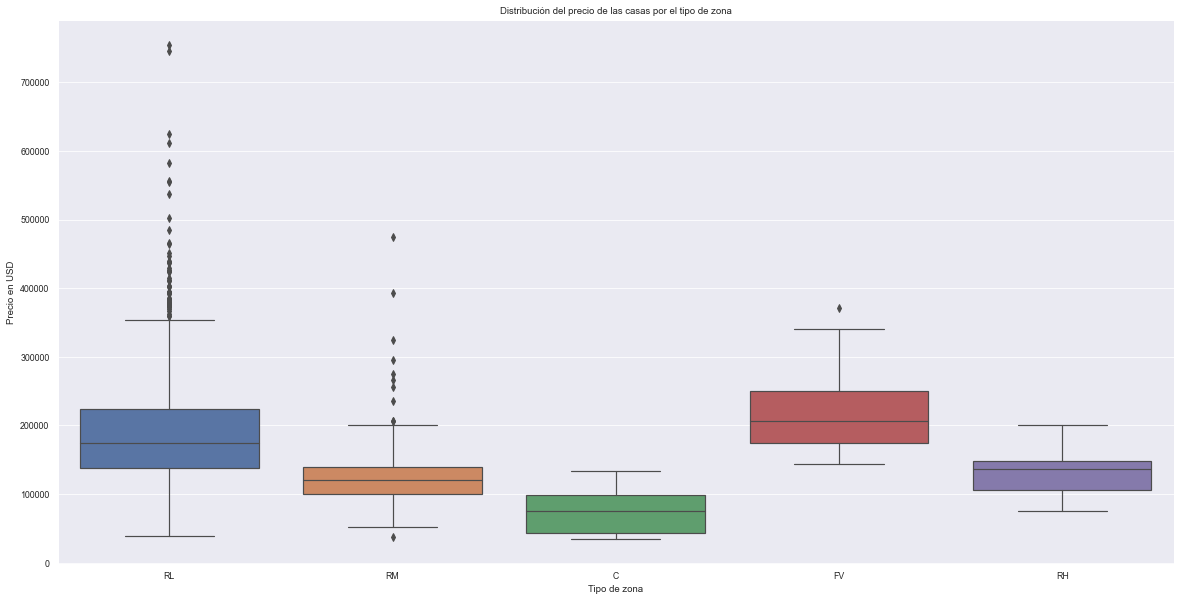

In [38]:
#Primero revisaremos como se distribuyen los datos en cuanto al precio y la zona de la casa

#Construimos primeramente el plot que queremos para hacer las gráficas.
sns.set(context ='paper', style = 'darkgrid', rc = {'figure.figsize': (20,10)})

#Seleccionamos hacer un boxplot con la zona en el eje X y el precio en el eje Y
ax = sns.boxplot(x = data['MSZoning'], y = data['SalePrice'])

#Creamos los nombres de los ejes y de la gráfica
ax.set_title('Distribución del precio de las casas por el tipo de zona')
ax.set(xlabel = 'Tipo de zona', ylabel = "Precio en USD")

ax.set_xticklabels(ax.get_xticklabels());
#Con el ax.get_xticklabels() va y busca los ejes que ya definimos previamente

In [39]:
#Observamos que los precios de las casas se comportan de manera diferente según la zona. 
#Para las casas en la zona FV: Floating Village Residential, los precios tienden a ser los más altos.
#Para las casas en la zona C: Commercial, los precios tienden a ser los más bajos.

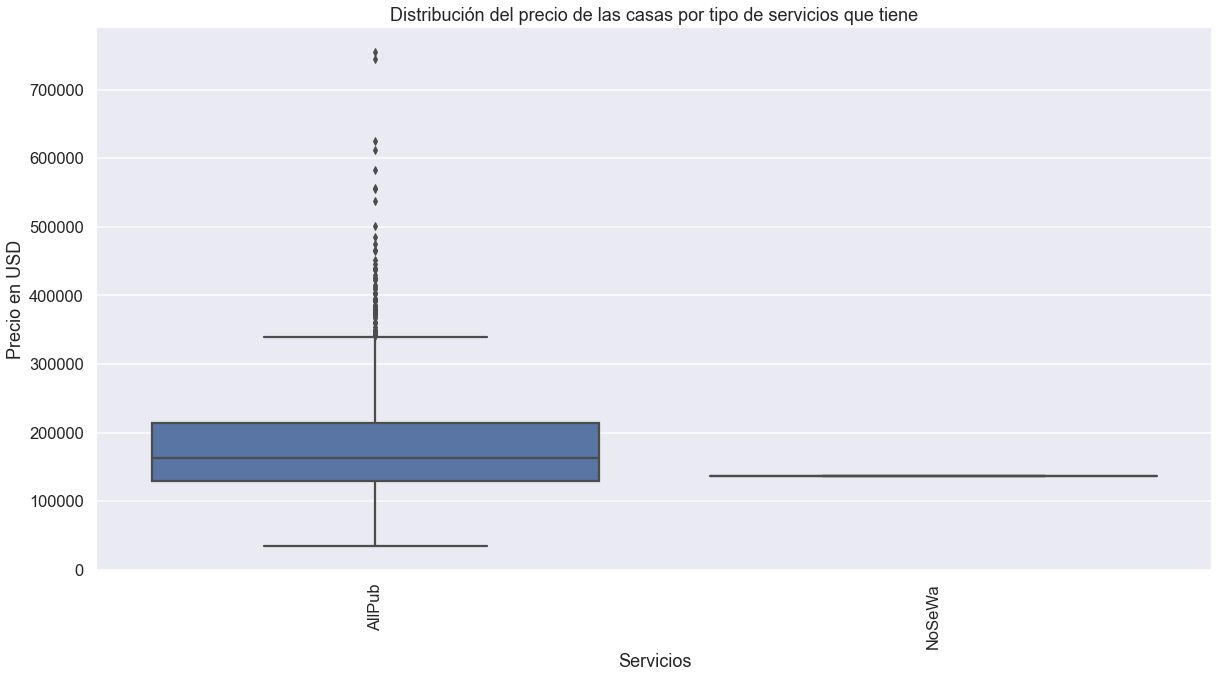

In [40]:
#Hacemos una gráfica de caja para ver la relación que hay entre Utilities: Type of utilities available y el precio de la casa
sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['Utilities'], y = data['SalePrice'])

ax.set_title('Distribución del precio de las casas por tipo de servicios que tiene')
ax.set(xlabel='Servicios', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [41]:
#Observamos que practicamente la totalidad de las casas cuentan con todos los servicios.
#Verificamos esta información
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

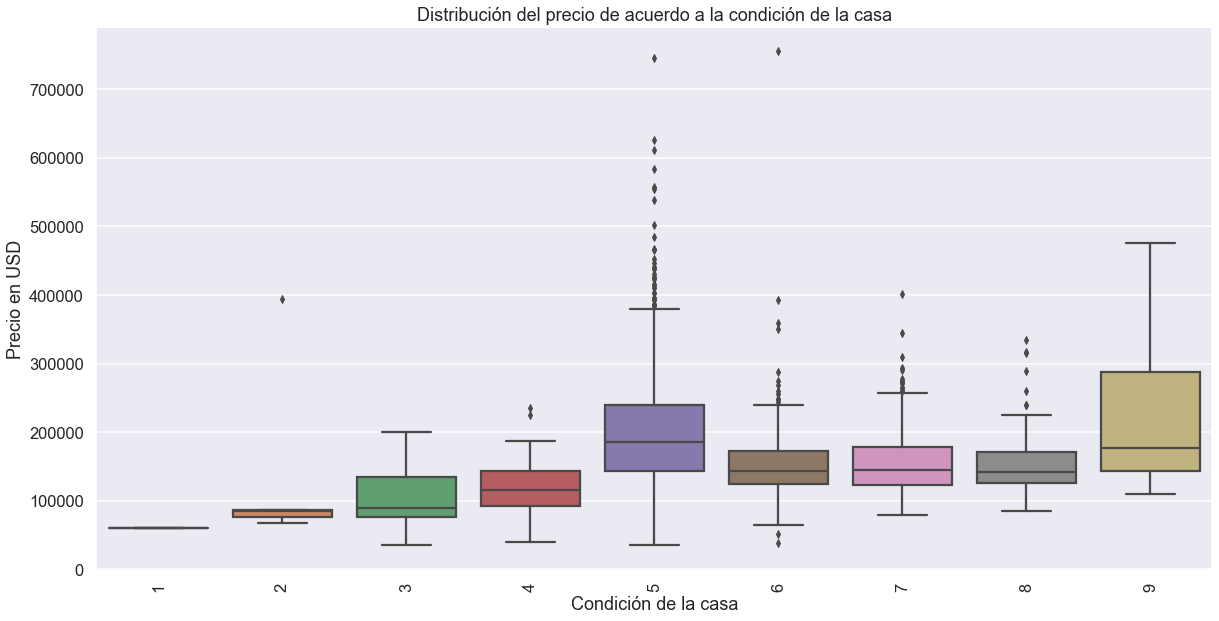

In [42]:
#Hacemos una gráfica de caja para ver como se distribuyen los precios de las casas de acuerdo a la condición general de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['OverallCond'], y = data['SalePrice'])

ax.set_title('Distribución del precio de acuerdo a la condición de la casa')
ax.set(xlabel='Condición de la casa', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [43]:
#Observamos una ligera tendencia a que los precios sean mayores entre mejor condición tenga la casa

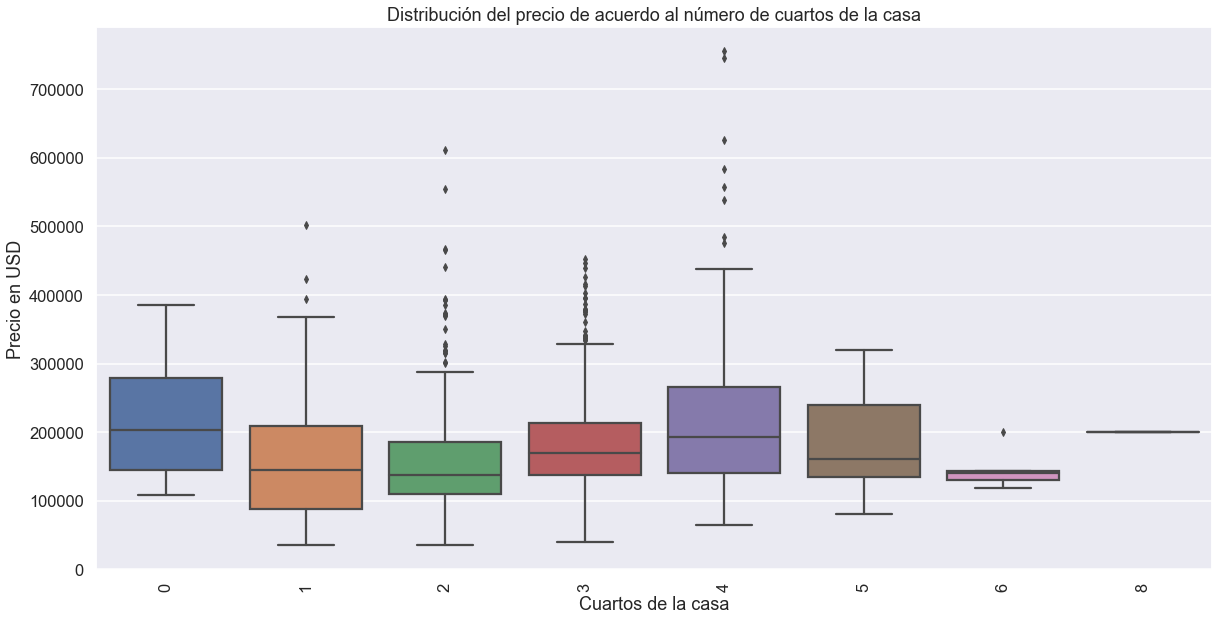

In [44]:
#Hacemos una gráfica de caja para ver como se distribuyen los precios de las casas de acuerdo al número de cuartos de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['BedroomAbvGr'], y = data['SalePrice'])

ax.set_title('Distribución del precio de acuerdo al número de cuartos de la casa')
ax.set(xlabel='Cuartos de la casa', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

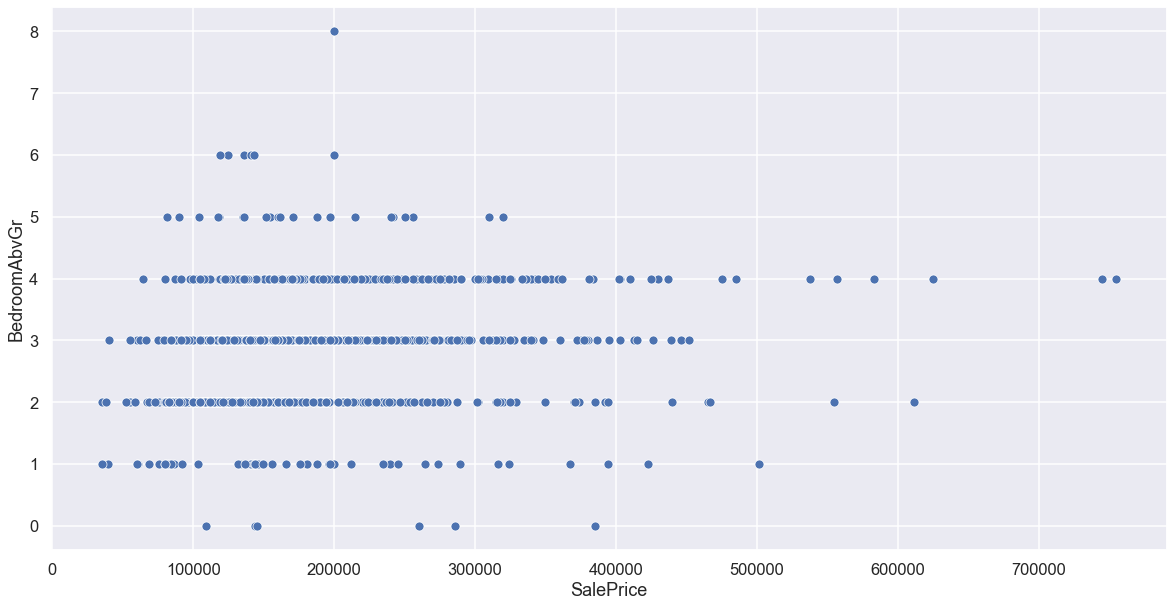

In [45]:
#Observamos que no hay una relación clara entre los precios de la casa y el número de cuartos.
#Obtamos por ver en un scatterplot como se ven los precios y el número de cuartos
sns.scatterplot(x ='SalePrice', y ='BedroomAbvGr', data = data);

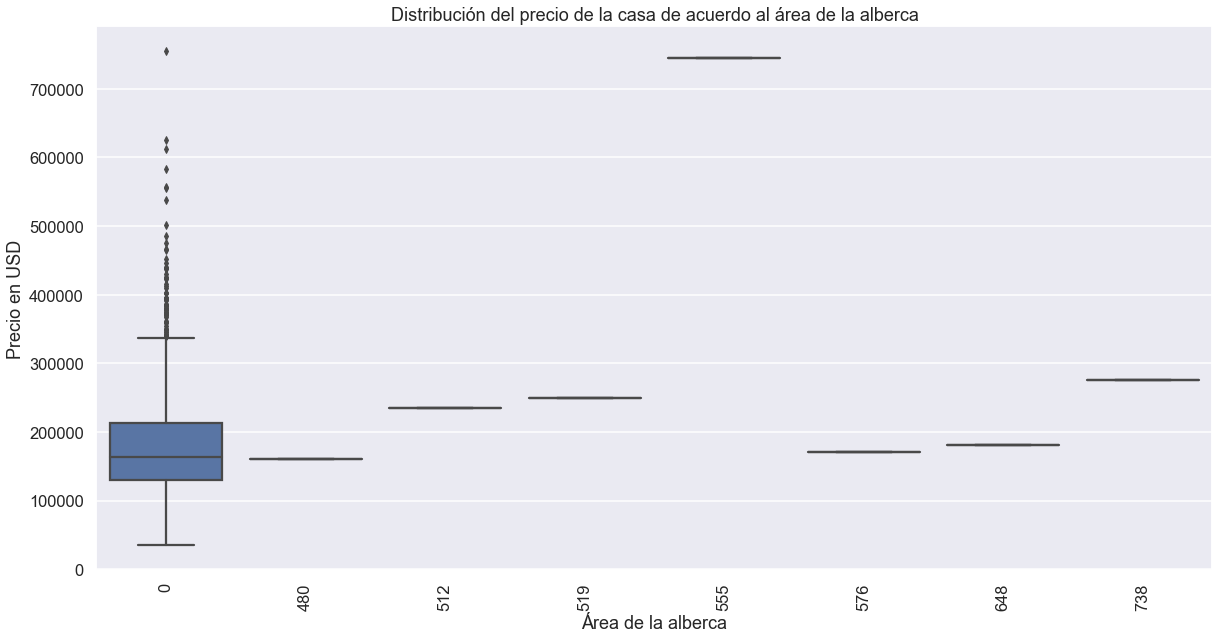

In [46]:
#Hacemos una gráfica de caja para ver como se distribuyen los precios de las casas de acuerdo al tamaño de la alberca de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['PoolArea'], y = data['SalePrice'])

ax.set_title('Distribución del precio de la casa de acuerdo al área de la alberca')
ax.set(xlabel='Área de la alberca', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [47]:
#Obervamos que practicamente ninguna casa tiene albercca, por lo que no es un factor que influya tanto en nuestro análisis.

<ipython-input-48-2f61df2aeac6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);


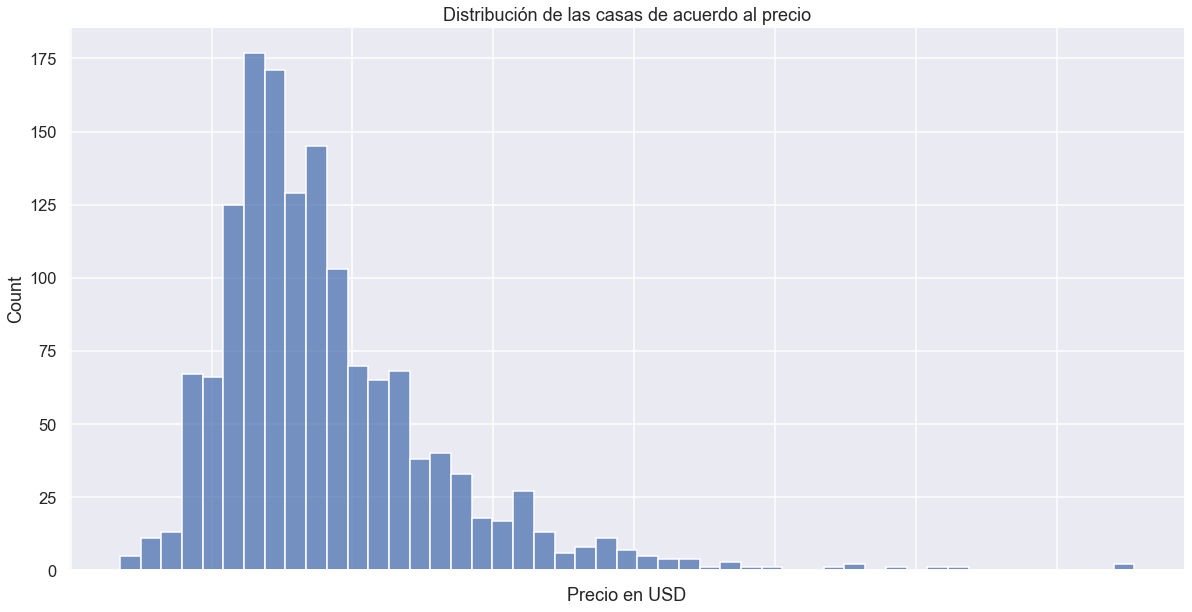

In [48]:
#Podemos hacer un histograma para revisar la distribución de la información
sns.set(context = 'talk', style = 'darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.histplot(x = data['SalePrice'])

ax.set_title('Distribución de las casas de acuerdo al precio')
ax.set(xlabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [49]:
# Observamos que el número de casas se distribuye aparentemente con normalidad

# Análisis estadístico

In [50]:
#Primero vemos la drescripción estadística de los datos numéricos.
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,LandSlope_code,Neighborhood_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,MasVnrType_code,ExterQual_code,ExterCond_code,Foundation_code,BsmtQual_code,BsmtCond_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,PavedDrive_code,SaleType_code,SaleCondition_code
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,3.028767,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,1.410274,1.075342,9.624658,10.339726,1.762329,2.539726,3.733562,1.396575,2.724658,3.691096,2.936986,3.150000,5.586986,1.036301,1.538356,0.934932,3.679452,2.339726,5.749315,2.485616,1.876712,4.716438,4.763014,1.856164,7.513014,3.770548
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.632017,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,0.834998,0.599127,3.197659,3.540570,0.614274,0.693995,0.731807,0.722394,1.278630,0.949616,1.567797,2.251517,1.200854,0.295124,1.739524,0.246731,1.055675,0.830161,0.979659,1.933206,1.191646,0.898787,0.802670,0.496592,1.552100,1.100854
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

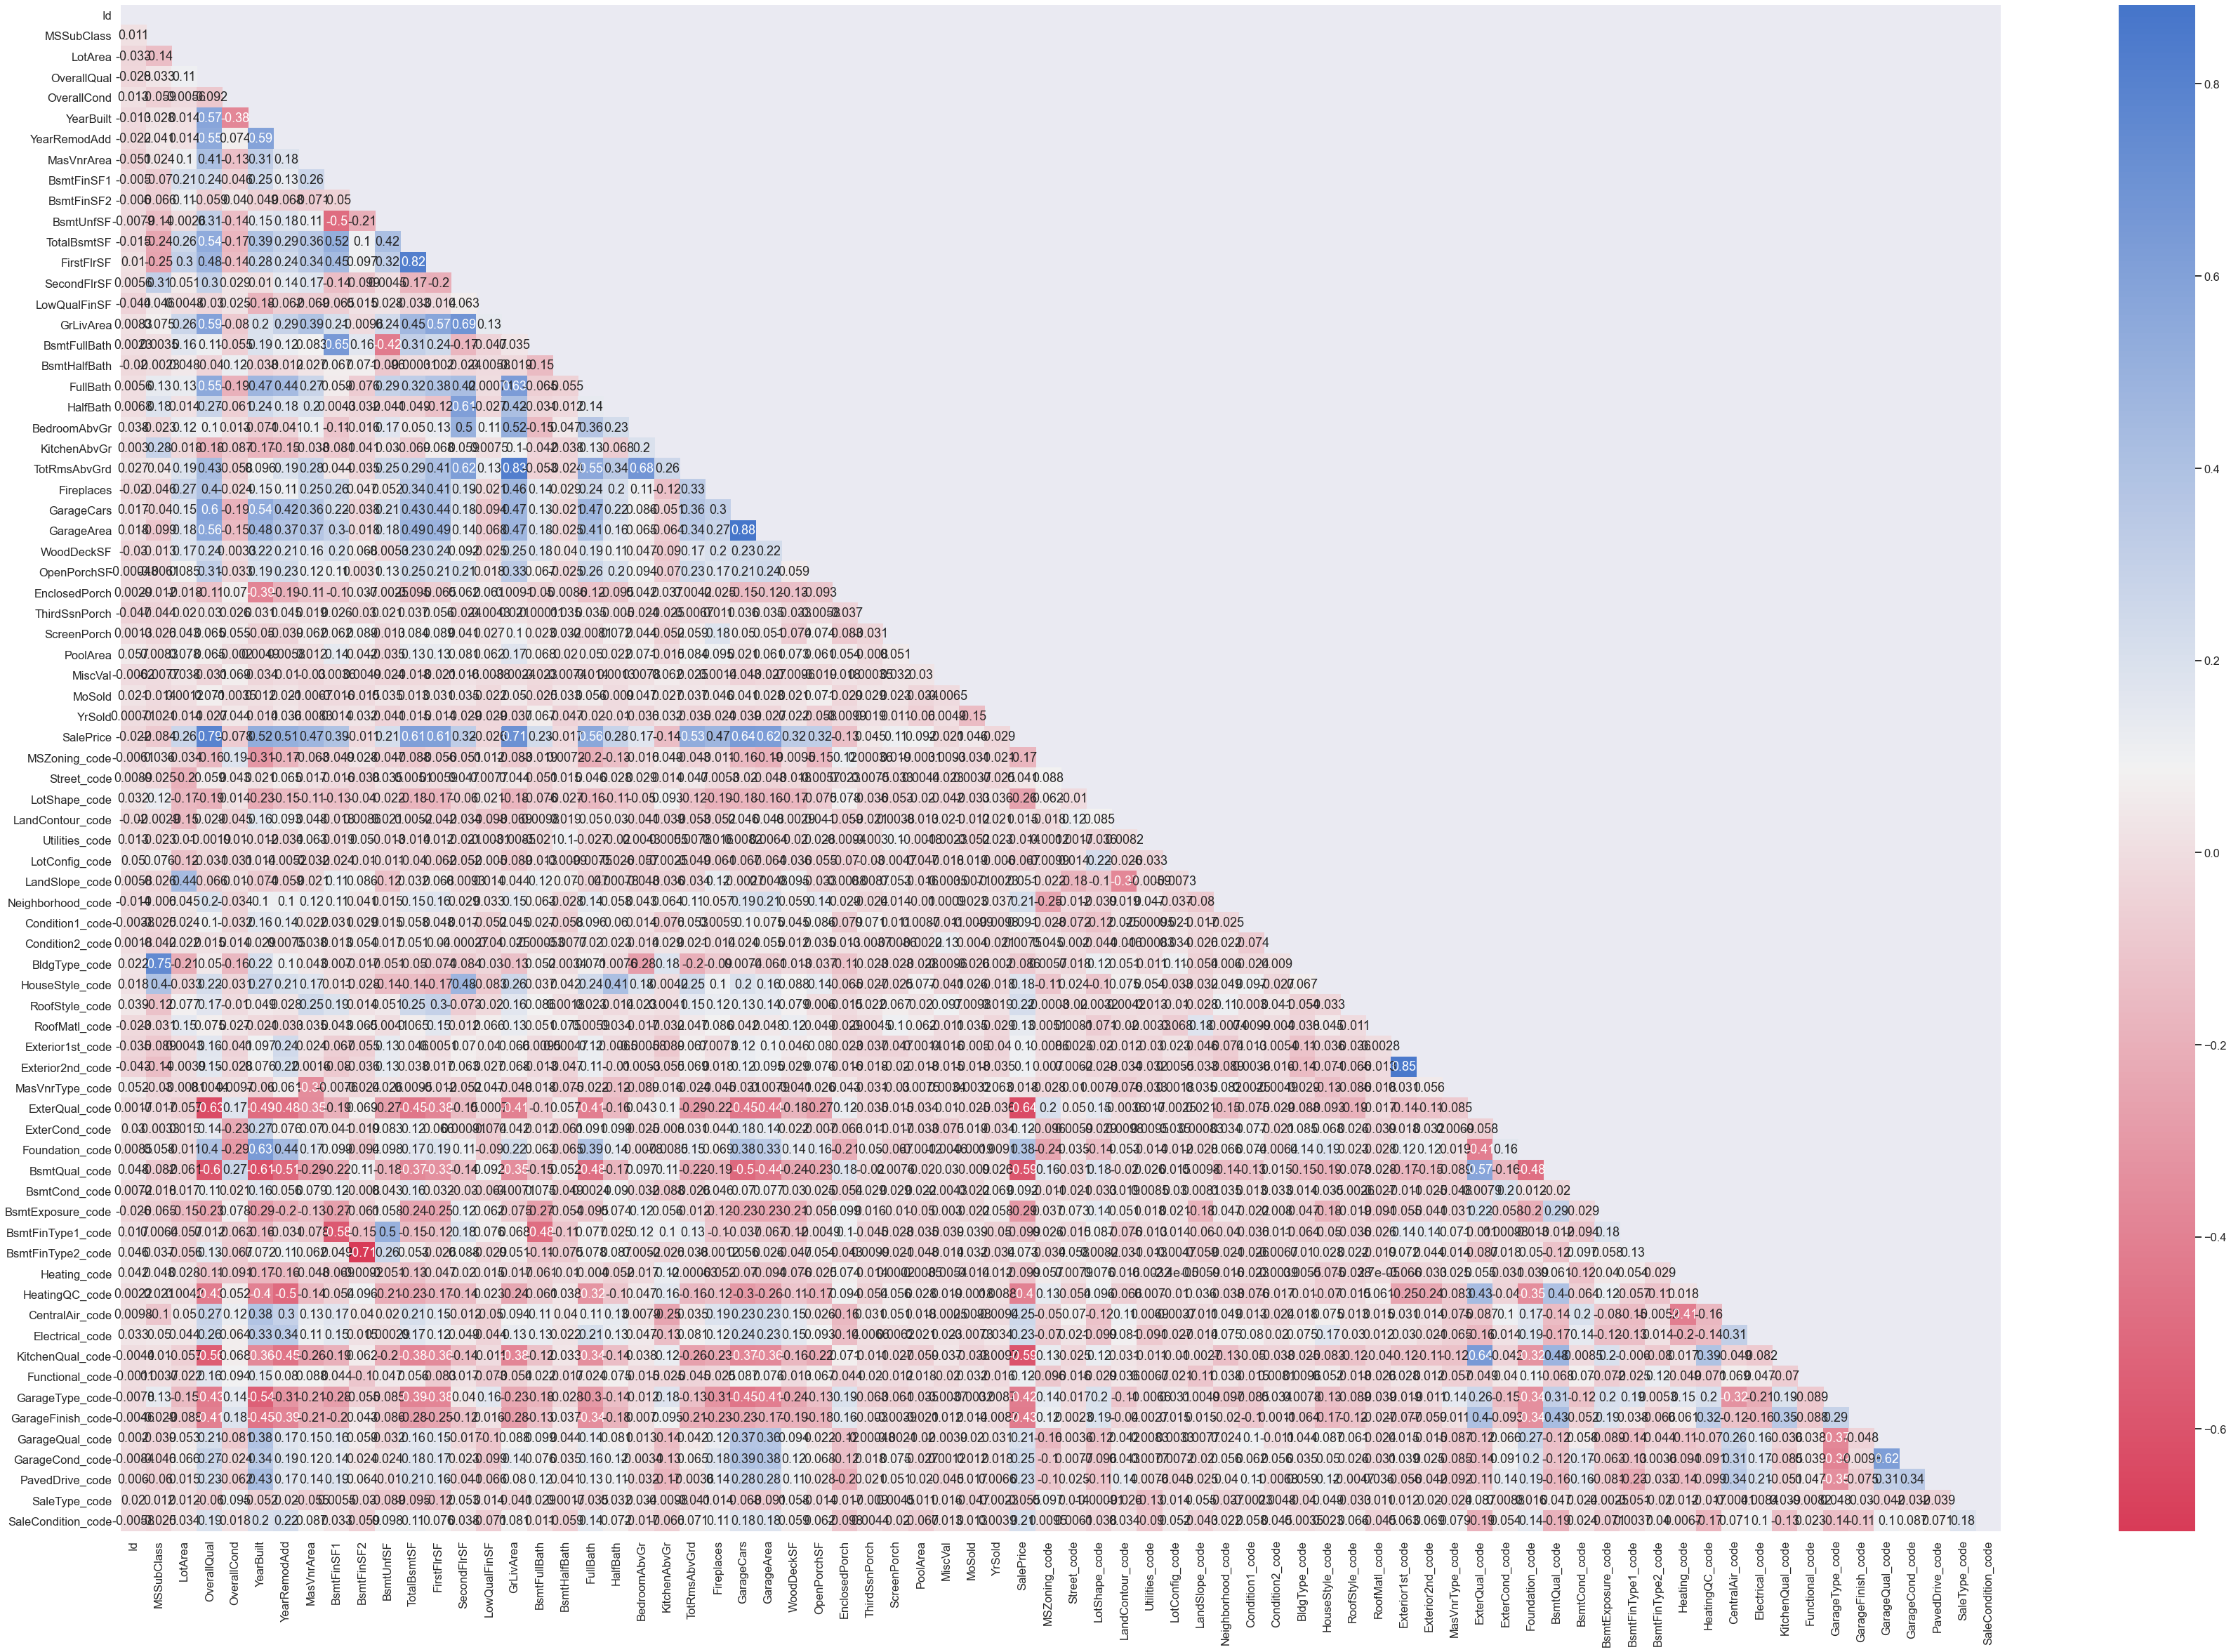

In [51]:
#Podemos crear un heatmap para revisar las correlaciones entre las variables.
data_corr = data.corr()

mask = np.zeros_like(data.corr(),dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (60,40))
cmap = sns.diverging_palette(6, 255,as_cmap = True)
sns.heatmap(data_corr, mask = mask, cmap = cmap, annot = True);

In [52]:
#Como son muchas variables, no se aprecia correctamente la gráfica, por lo que analizaremos la tabla
saleprice_corr = data_corr[35:36].transpose()
saleprice_corr.sort_values('SalePrice')

,SalePrice
ExterQual_code,-0.636884
BsmtQual_code,-0.593734
KitchenQual_code,-0.589189
GarageFinish_code,-0.425684
GarageType_code,-0.415283
HeatingQC_code,-0.400178
BsmtExposure_code,-0.294589
LotShape_code,-0.255580
MSZoning_code,-0.166872
KitchenAbvGr,-0.135907


In [53]:
#Observamos que las variables numéricas con mayor relación (.60 o más) con el precio de las casas son:
#OverallQual, GrLivArea, GarageCars, ExterQual_code, GarageArea, TotalBsmtSF, 1stFlorSF

#Podríamos ver como se relacionan todas las demás variables entre sí.

In [55]:
#Modelo de regresión: 

#Definimos nuestras variables independientes
x = data[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
          'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
          'MSZoning_code', 'Street_code', 'LotShape_code', 'LandContour_code', 'Utilities_code',
          'LotConfig_code', 'LandSlope_code', 'Neighborhood_code', 'Condition1_code',
          'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code',
          'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code',
          'BsmtFinType2_code', 'Heating_code', 'HeatingQC_code', 'CentralAir_code', 'Electrical_code', 
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'GarageFinish_code', 'GarageQual_code',
          'GarageCond_code', 'PavedDrive_code', 'SaleType_code', 'SaleCondition_code']]

#Definimos nuestra variable dependiente
y = data['SalePrice']

#Agregamos el intercepto para el modelo y lo corremos
X = sm.add_constant(x) 
Y = y

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:00:49   Log-Likelihood:                -17172.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1389   BIC:                         3.486e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.907e+06   1.33e+06      1.439      0.150   -6.92e+05    4.51e+06
MSSubClass          -120.3786     45.330     -2.656      0.008    -209.301     -31.456
LotArea                0.3514      0.106      3.329      0.001       0.144       0.559
OverallQual         1.164e+04   1185.110      9.824      0.000    9317.280     1.4e+04
OverallCond         4662.8128   1039.481      4.486      0.000    2623.691    6701.934
YearBuilt            189.9926     74.415      2.553      0.011      44.014     335.971
YearRemodAdd          25.7523     66.512      0.387      0.699    -104.723     156.228
MasVnrArea            32.0790      6.096      5.262      0.000      20.121      44.037
BsmtFinSF1             4.0473      2.927      1.383      0.167      -1.695       9.789
BsmtFinSF2             6.1194      5.823      1.051      0.294      -5.304      17.543
BsmtUnfSF             -3.0563      2.963     -1.032      0.302      -8.868       2.756
TotalBsmtSF            7.1105      3.385      2.101      0.036       0.470      13.751
FirstFlrSF            18.8457      5.886      3.202      0.001       7.299      30.393
SecondFlrSF           19.3529      5.390      3.590      0.000       8.779      29.926
LowQualFinSF         -12.2375     13.818     -0.886      0.376     -39.344      14.869
GrLivArea             25.9611      5.408      4.800      0.000      15.352      36.570
BsmtFullBath        7297.2277   2454.929      2.972      0.003    2481.460    1.21e+04
BsmtHalfBath        2023.5321   3863.762      0.524      0.601   -5555.907    9602.971
FullBath            4040.8444   2678.618      1.509      0.132   -1213.730    9295.418
HalfBath             310.0593   2540.180      0.122      0.903   -4672.944    5293.062
BedroomAbvGr       -4109.9384   1666.649     -2.466      0.014   -7379.360    -840.517
KitchenAbvGr       -1.321e+04   4991.517     -2.647      0.008    -2.3e+04   -3422.067
TotRmsAbvGrd        3467.9144   1170.803      2.962      0.003    1171.182    5764.647
Fireplaces          4735.2315   1674.752      2.827      0.005    1449.915    8020.548
GarageCars          1.131e+04   2707.548      4.178      0.000    6000.589    1.66e+04
GarageArea            -3.5063      9.316     -0.376      0.707     -21.782      14.769
WoodDeckSF            19.4581      7.487      2.599      0.009       4.771      34.146
OpenPorchSF          -13.8476     14.278     -0.970      0.332     -41.856      14.160
EnclosedPorch          5.8579     15.644      0.374      0.708     -24.830      36.546
ThirdSsnPorch         26.1607     29.102      0.899      0.369     -30.928      83.249
ScreenPorch           48.9570     16.094      3.042      0.002      17.386      80.528
PoolArea             -25.0306     21.983     -1.139      0.255     -68.154      18.092
MiscVal               -0.5161      1.7

In [58]:
#Podemos sacar la ecuación de nuestro modelo, con el intercepto y los coeficientes de cada variable
#Vemos que el modelo tiene una R2 de 0.847, por lo que es un buen modelo prediciendo el precio de las casas.

#Vemos que hay muchas variables que no aportan mucho al modelo y otras que no son significativas para el precio de la casa

In [59]:
#Estandarizamos los datos: media  0 y varianza 1

features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
          'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
          'MSZoning_code', 'Street_code', 'LotShape_code', 'LandContour_code', 'Utilities_code',
          'LotConfig_code', 'LandSlope_code', 'Neighborhood_code', 'Condition1_code',
          'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code',
          'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code',
          'BsmtFinType2_code', 'Heating_code', 'HeatingQC_code', 'CentralAir_code', 'Electrical_code', 
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'GarageFinish_code', 'GarageQual_code',
          'GarageCond_code', 'PavedDrive_code', 'SaleType_code', 'SaleCondition_code']

x = data.loc[:,features].values
types = data ['SalePrice']

#Aplicamos la estandarización de los datos

x = StandardScaler().fit_transform(x)

In [60]:
#Creamos el dataframe de los datos normalizados
data_norm = pd.DataFrame (x, columns = features)

data_norm.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,LandSlope_code,Neighborhood_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,MasVnrType_code,ExterQual_code,ExterCond_code,Foundation_code,BsmtQual_code,BsmtCond_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,PavedDrive_code,SaleType_code,SaleCondition_code
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,-0.491516,-0.125797,0.743092,0.751626,-1.241449,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.678263,-0.510942,0.344051,-0.123046,-0.884658,0.263813,0.303747,-0.409369,0.255978,-0.768736,0.103495,0.315602,0.295349,0.289745,0.313867,0.208502
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.045532,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.235906,-1.399536,0.344051,-0.123046,-0.884658,0.263813,0.303747,0.795629,0.255978,-0.768736,0.103495,0.315602,0.295349,0.289745,0.313867,0.208502
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.045532,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,-0.491516,-0.125797,0.743092,0.751626,-1.241449,-0.777976,0.364207,0.835599,-0.566939,0.325405,-0.597850,-0.510942,0.344051,-0.123046,-0.884658,0.263813,0.303747,-0.409369,0.255978,-0.768736,0.103495,0.315602,0.295349,0.289745,0.313867,0.208502
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,-0.491516,-0.125797,1.055928,1.316701,0.387047,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.678263,-1.399536,0.344051,-0.123046,0.265476,0.263813,0.303747,-0.409369,0.255978,1.301075,0.942959,0.315602,0.295349,0.289745,0.313867,-3.426284
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,

In [61]:
#Hacemos el PCA

pca = PCA()
pca.fit(data_norm)

PCA()

In [62]:
#Revisamos los componentes que nos arroja el PCA, para ver cuantos componentes necesitamos para explicar el 80% de la varianza
pca.explained_variance_ratio_

array([1.37349899e-01, 5.62326329e-02, 4.62821468e-02, 4.03229923e-02,
       3.33209115e-02, 2.99101254e-02, 2.50364018e-02, 2.35283744e-02,
       2.15571642e-02, 2.09236816e-02, 2.01255406e-02, 1.92575775e-02,
       1.87443058e-02, 1.82347380e-02, 1.73562303e-02, 1.67456605e-02,
       1.62319687e-02, 1.59108365e-02, 1.53747813e-02, 1.52824017e-02,
       1.51104582e-02, 1.43646007e-02, 1.42118954e-02, 1.37792835e-02,
       1.36090057e-02, 1.32051023e-02, 1.30415773e-02, 1.23926244e-02,
       1.20716140e-02, 1.19220307e-02, 1.18483854e-02, 1.14018000e-02,
       1.11060948e-02, 1.08352316e-02, 1.06710219e-02, 1.05304268e-02,
       1.03436145e-02, 9.81186467e-03, 9.27701950e-03, 9.05592347e-03,
       8.89375865e-03, 8.77222133e-03, 8.43841140e-03, 8.21886543e-03,
       8.06884279e-03, 7.75451333e-03, 7.57151282e-03, 7.51691684e-03,
       6.96727585e-03, 6.64729687e-03, 6.10095293e-03, 5.96633504e-03,
       5.59533293e-03, 5.53057410e-03, 5.41545780e-03, 5.36522752e-03,
      

In [63]:
#La suma de los componentes debe ser 1
sum(pca.explained_variance_ratio_)

1.0000000000000002

Text(0, 0.5, 'Varianza acumulada explicada')

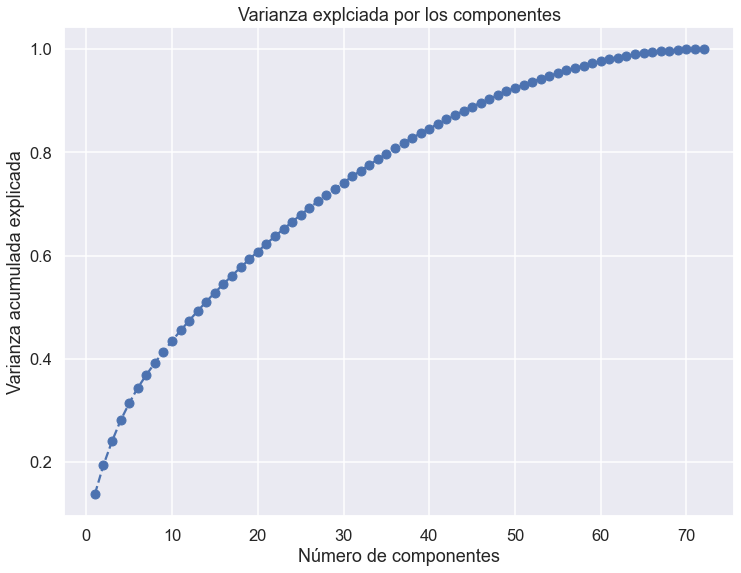

In [64]:
#Graficamos los componentes para ver cuando sumen el 80%
plt.figure (figsize = (12,9))
plt.plot(range(1,73), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ("Varianza explciada por los componentes")
plt.xlabel ('Número de componentes')
plt.ylabel ('Varianza acumulada explicada')

In [65]:
#Vemos con cuantos componentes alcanzamos el 80% de la explicación de la varianza.
#Parece que con 34-35 componentes se alcanza

#Revisamos para comprobar
sum(pca.explained_variance_ratio_[:36])


0.8078295237818027

In [66]:
#Entrenamos el modelo con los 35 componentes que nos indicó previamente
pca = PCA(n_components = 35)
pca.fit(data_norm)

PCA(n_components=35)

In [67]:
#Transformamos el dataframe
data_transform = pca.transform(data_norm)

In [68]:
#Creamos un dataframe para ver nuevamente la información con los 35 componentes
data_pca = pd.DataFrame(data_transform, index = data_norm.index, columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12', 'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17', 'Componente 18', 'Componente 19', 'Componente 20', 'Componente 21', 'Componente 22', 'Componente 23', 'Componente 24', 'Componente 25', 'Componente 26', 'Componente 27', 'Componente 28', 'Componente 29', 'Componente 30', 'Componente 31', 'Componente 32', 'Componente 33', 'Componente 34', 'Componente 35'])
data_pca.head()

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7,Componente 8,Componente 9,Componente 10,Componente 11,Componente 12,Componente 13,Componente 14,Componente 15,Componente 16,Componente 17,Componente 18,Componente 19,Componente 20,Componente 21,Componente 22,Componente 23,Componente 24,Componente 25,Componente 26,Componente 27,Componente 28,Componente 29,Componente 30,Componente 31,Componente 32,Componente 33,Componente 34,Componente 35
0,2.086023,0.487331,-1.636096,1.655411,-0.293721,1.253845,-0.443370,-0.325633,-1.881395,0.777237,0.352204,-0.255492,0.201481,1.117356,0.249987,0.880656,-0.397259,-0.078552,-0.176288,0.051198,-0.086396,1.123069,-0.105803,0.584087,0.015183,-0.544823,-0.138332,1.220088,0.103487,0.790376,0.069902,-0.215102,0.162701,-0.678229,-0.715790
1,0.276983,-2.127506,0.998719,0.234631,-0.956191,0.098591,-1.108876,-0.188177,0.578906,-0.565677,-0.252934,0.418394,0.151380,-2.541263,0.174325,-0.005346,-0.389744,-1.240376,-0.199871,-0.721116,2.784452,1.203013,-0.421253,-1.219584,1.302100,1.244421,1.191890,-0.732918,0.656391,-0.371636,-0.383827,-0.786843,-1.659307,0.455604,0.222919
2,2.570060,0.193649,-1.286517,1.320644,-0.467277,1.543007,0.027282,0.526996,-1.124103,0.317796,0.753949,-0.447388,0.405326,0.184773,-0.195937,-0.343427,-0.044659,0.129234,-0.175897,0.765905,-0.013481,-0.099593,0.044392,0.445865,-0.840266,-0.100247,-0.114570,0.260099,0.505312,0.365653,0.027949,0.643140,1.014907,0.618500,-0.333814
3,-1.542374,1.138250,1.616474,0.331522,-0.664389,1.350558,0.089716,-0.634392,-1.829860,1.143344,1.452110,2.108435,-0.711996,-1.841847,-0.690388,0.939147,3.153941,-0.869455,-0.055536,0.751966,-2.316076,-0.875450,0.437981,-0.429280,0.008788,0.177831,0.819198,1.245509,-0.646606,1.275321,-0.706839,-1.336931,-0.385661,1.124427,-1.597467
4,4.857378,1.147920,0.424444,1.608957,-0.434772,1.111311,0.066181,0.392422,-1.433670,0.622448,0.660114,-0.149549,0.264721,-0.815892,0.208525,-1.140809,0.411941,-0.574973,0.424221,0.235374,0.338634,-0.949593,0.367813,0.304455,-0.383572,-0.265199,-0.129605,-0.197048,1.125231,-0.098627,0.591579,0.861409,0.925523,0.628886,0.128260


In [69]:
#Para revisar que atributos te explica cada uno de los componentes

data_pca_comp= pd.DataFrame (data = pca.components_, columns = data_norm.columns.values, index = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12', 'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17', 'Componente 18', 'Componente 19', 'Componente 20', 'Componente 21', 'Componente 22', 'Componente 23', 'Componente 24', 'Componente 25', 'Componente 26', 'Componente 27', 'Componente 28', 'Componente 29', 'Componente 30', 'Componente 31', 'Componente 32', 'Componente 33', 'Componente 34', 'Componente 35'])
data_pca_comp

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,LandSlope_code,Neighborhood_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,MasVnrType_code,ExterQual_code,ExterCond_code,Foundation_code,BsmtQual_code,BsmtCond_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,PavedDrive_code,SaleType_code,SaleCondition_code
Componente 1,-0.007579,0.070135,0.264122,-0.070903,0.240467,0.203251,0.157178,0.123759,-0.014267,0.083910,0.207934,0.196217,0.086759,-0.026199,0.214002,0.073984,-0.009359,0.208692,0.102336,0.048705,-0.043719,0.159842,0.143633,0.241125,0.231971,0.113700,0.117246,-0.078336,0.015097,0.019632,0.028508,-0.008966,0.015270,-0.006516,-0.082842,0.005753,-0.094278,0.018781,-0.002435,-0.018499,0.000500,0.067340,0.048534,0.009282,0.008167,0.087218,0.062115,0.022264,0.053980,0.047415,-0.013661,-0.217384,0.062694,0.175938,-0.219886,0.043285,-0.102925,-0.035281,0.033274,-0.052077,-0.154072,0.113528,0.111692,-0.185163,0.036087,-0.186128,-0.162484,0.114872,0.121560,0.112179,-0.019955,0.077092
Componente 2,0.103556,-0.030524,0.060626,-0.007332,-0.124460,-0.001317,0.017170,-0.260295,-0.119996,0.209218,-0.104014,-0.064817,0.349383,0.102529,0.252043,-0.259632,-0.038460,0.185465,0.159404,0.278887,0.146739,0.302528,0.007736,-0.004522,-0.031271,-0.051643,0.080036,0.093231,-0.022228,-0.010042,0.011172,0.002145,0.028801,-0.037346,0.009870,0.036743,0.035020,-0.042803,-0.006560,-0.012897,-0.063340,0.005355,-0.021587,0.000479,-0.061321,0.107189,-0.031194,-0.010898,0.078379,0.082301,0.015587,-0.040997,-0.035504,-0.011773,-0.007588,-0.088109,0.139773,0.291165,0.104096,0.079403,-0.043096,-0.145214,-0.078642,-0.048904,-0.021238,0.147931,-0.006222,-0.146535,-0.126003,-0.167768,0.001792,-0.002413
Componente 3,-0.165448,0.278565,-0.026594,0.093032,-0.224069,-0.182424,0.067706,0.191347,0.171887,-0.081393,0.180160,0.256712,0.035048,0.085683,0.225902,0.128629,0.068261,-0.016761,-0.026304,0.197786,0.055484,0.206844,0.207031,-0.001180,0.047616,0.087075,0.029622,0.112227,0.001625,0.117718,0.115155,0.037508,0.011662,-0.007353,0.083336,-0.054921,-0.080509,-0.130534,0.032015,-0.093500,0.183480,0.043479,-0.036499,0.023148,-0.232839,-0.080386,0.127948,0.131067,-0.116082,-0.100833,-0.037514,0.070844,-0.087642,-0.200154,0.139522,-0.030196,-0.023110,-0.110932,-0.142843,0.032718,0.162379,-0.042450,-0.053489,0.033559,-0.099581,-0.000581,0.067113,-0.040974,-0.030583,-0.046243,-0.003043,-0.077775
Componente 4,0.315788,-0.036284,-0.038551,0.044512,0.053110,-0.034435,0.054747,0.067173,0.068201,-0.308484,-0.215793,-0.211768,0.284644,-0.037268,0.077217,0.069583,0.069700,0.029096,0.296757,0.129333,0.050540,0.074542,0.038678,-0.002966,-0.027069,0.045104,-0.004943,-0.056840,-0.021112,0.034392,0.034517,0.010501,-0.006966,0.010527,-0.023196,0.012110,-0.016181,0.063024,0.019805,-0.005508,0.002521,0.011109,0.026929,-0.021024,0.167164,0.363476,-0.078276,0.008365,-0.216539,-0.232120,-0.162574,0.128827,0.014775,0.012640,0.065916,0.048243,0.009890,-0.184551,-0.088411,-0.039845,0.125508,0.092925,0.119823,0.136090,0.020980,-0.040444,0.014490,0.113029,0.096246,0.124552,0.061460,-0.046162
Componente 5,0.317516,0.017916,0.010717,-0.164735,-0.006139,0.006555,0.018018,0.191148,-0.016313,-0.152938,0.038687,0.062985,-0.032984,0.046102,0.023202,0.221643,-0.068386,0.041606,-0.076734,-0.160742,0.208621,-0.022485,-0.032244,-0.069352,-0.068343,0.030729

In [71]:
#Para realizar un modelo más práctico, realizaremos un ANOVA, para revisar que variables son significativas en nuestro modelo

#Con el ols calculamos la suma de cuadrados. Ordinal Least Squares
#Como queremos sacar la relación de height (variable dependiente) y sun (variable independiente), las ponemos en ols
model_simp = ols('SalePrice ~ MSSubClass + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_code + Street_code + LotShape_code + LandContour_code + Utilities_code + LotConfig_code + LandSlope_code + Neighborhood_code + Condition1_code + Condition2_code + BldgType_code + HouseStyle_code + RoofStyle_code + RoofMatl_code + Exterior1st_code + Exterior2nd_code + MasVnrType_code + ExterQual_code + ExterCond_code + Foundation_code + BsmtQual_code + BsmtCond_code + BsmtExposure_code + BsmtFinType1_code + BsmtFinType2_code + Heating_code + HeatingQC_code + CentralAir_code + Electrical_code + KitchenQual_code + Functional_code + GarageType_code + GarageFinish_code + GarageQual_code + GarageCond_code + PavedDrive_code + SaleType_code + SaleCondition_code', data = data).fit()
#Se está "entrenando" el modelo, para decirle que datos va a usar cuando lo metamos en la ANOVA

#Con el .fit le estamos pidiendo al modelo que ajuste la línea que relaciona los datos que le ponemos al "ols" en mejor medida.

In [73]:
sm.stats.anova_lm(model_simp)

,df,sum_sq,mean_sq,F,PR(>F)
MSSubClass,1.0,6.541130e+10,6.541130e+10,64.660153,1.888831e-15
LotArea,1.0,5.966856e+11,5.966856e+11,589.833550,6.967768e-109
OverallQual,1.0,5.467491e+12,5.467491e+12,5404.704903,0.000000e+00
OverallCond,1.0,1.060528e+09,1.060528e+09,1.048350,3.060657e-01
YearBuilt,1.0,9.261872e+10,9.261872e+10,91.555138,4.754472e-21
YearRemodAdd,1.0,2.957231e+10,2.957231e+10,29.232721,7.547049e-08
MasVnrArea,1.0,2.175227e+11,2.175227e+11,215.024790,2.251622e-45
BsmtFinSF1,1.0,1.669333e+11,1.669333e+11,165.016330,9.030175e-36
BsmtFinSF2,1.0,8.697119e+09,8.697119e+09,8.597246,3.421856e-03
BsmtUnfSF,1.0,6.149832e+10,6.149832e+10,60.792103,1.236682e-14


In [74]:
#Con este modelo vemos que variables son significativas en el precio de las casas
#Las variables que tengan un P-value menor a 0.05 afectan de manera significativa el precio de las casas

In [76]:
#Modelo de regresión: 

#Definimos nuestras variables independientes
x2 = data[['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars','WoodDeckSF', 'ScreenPorch', 'LandSlope_code', 'Neighborhood_code',
          'Condition2_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'MasVnrType_code', 'ExterQual_code', 'BsmtQual_code', 'BsmtExposure_code',
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'SaleCondition_code']]

#Definimos nuestra variable dependiente
y2 = data['SalePrice']

#Agregamos el intercepto para el modelo y lo corremos
X2 = sm.add_constant(x2) 
Y2 = y2

model2 = sm.OLS(Y2, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:15:14   Log-Likelihood:                -17213.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1426   BIC:                         3.467e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.692e+05   1.26e+05     -5.307      0.000   -9.17e+05   -4.22e+05
MSSubClass          -200.4218     23.605     -8.491      0.000    -246.726    -154.118
LotArea                0.3247      0.103      3.152      0.002       0.123       0.527
OverallQual         1.335e+04   1140.985     11.702      0.000    1.11e+04    1.56e+04
YearBuilt            153.6821     48.661      3.158      0.002      58.227     249.137
YearRemodAdd         199.8090     57.985      3.446      0.001      86.064     313.554
MasVnrArea            31.5724      6.055      5.214      0.000      19.695      43.450
BsmtFinSF1             7.4314      2.349      3.164      0.002       2.824      12.039
BsmtFinSF2             5.0446      4.190      1.204      0.229      -3.174      13.264
BsmtUnfSF             -4.1753      2.244     -1.861      0.063      -8.577       0.226
TotalBsmtSF            8.3007      3.124      2.657      0.008       2.172      14.430
FirstFlrSF            40.4266      5.385      7.508      0.000      29.864      50.989
SecondFlrSF           47.5280      3.954     12.020      0.000      39.771      55.285
BsmtFullBath        5789.7825   2293.327      2.525      0.012    1291.125    1.03e+04
BedroomAbvGr       -3564.0725   1617.951     -2.203      0.028   -6737.891    -390.254
TotRmsAbvGrd        2878.1694   1103.586      2.608      0.009     713.344    5042.995
Fireplaces          6052.5029   1637.558      3.696      0.000    2840.222    9264.784
GarageCars          9507.9023   1605.273      5.923      0.000    6358.953    1.27e+04
WoodDeckSF            22.8806      7.424      3.082      0.002       8.317      37.444
ScreenPorch           48.3900     15.853      3.052      0.002      17.293      79.487
LandSlope_code      2606.0805   3592.905      0.725      0.468   -4441.865    9654.026
Neighborhood_code    353.5545    149.515      2.365      0.018      60.261     646.848
Condition2_code    -8999.7832   3307.044     -2.721      0.007   -1.55e+04   -2512.590
HouseStyle_code    -1061.5047    600.796     -1.767      0.077   -2240.043     117.034
RoofStyle_code      2088.5741   1110.121      1.881      0.060     -89.071    4266.219
RoofMatl_code       5099.7023   1498.493      3.403      0.001    2160.215    8039.190
Exterior1st_code    -774.5762    283.477     -2.732      0.006   -1330.653    -218.500
MasVnrType_code     4129.3932   1585.146      2.605      0.009    1019.926    7238.861
ExterQual_code     -8595.3153   1909.486     -4.501      0.000   -1.23e+04   -4849.611
BsmtQual_code      -3681.2401    997.494     -3.690      0.000   -5637.954   -1724.526
BsmtExposure_code  -3022.6227    638.857     -4.731      0.000   -4275.824   -1769.422
KitchenQual_code   -9139.3220   1424.383     -6.416      0.000   -1.19e+04   -6345.211
Functional_code     4270.9531    926.8

In [77]:
#Podemos sacar la ecuación de nuestro modelo, con el intercepto y los coeficientes de cada variable
#Vemos que el modelo tiene una R2 de 0.839, por lo que es un buen modelo prediciendo el precio de las casas.

In [78]:
#Estandarizamos los datos: media  0 y varianza 1

features2 = ['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars','WoodDeckSF', 'ScreenPorch', 'LandSlope_code', 'Neighborhood_code',
          'Condition2_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'MasVnrType_code', 'ExterQual_code', 'BsmtQual_code', 'BsmtExposure_code',
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'SaleCondition_code']

x2 = data.loc[:,features2].values
types = data ['SalePrice']

#Aplicamos la estandarización de los datos

x2 = StandardScaler().fit_transform(x2)

In [80]:
#Creamos el dataframe de los datos normalizados
data_norm2 = pd.DataFrame (x2, columns = features2)

data_norm2.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,ScreenPorch,LandSlope_code,Neighborhood_code,Condition2_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,MasVnrType_code,ExterQual_code,BsmtQual_code,BsmtExposure_code,KitchenQual_code,Functional_code,GarageType_code,SaleCondition_code
0,0.073375,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,1.107810,0.163779,0.912210,-0.951226,0.311725,-0.752176,-0.270208,-0.225716,-1.206215,-0.03174,1.026689,-0.491516,-0.125797,0.743092,-1.241449,-0.777976,-0.566939,0.678263,-0.409369,0.255978,-0.768736,0.208502
1,-0.872563,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.819964,0.163779,-0.318683,0.600495,0.311725,1.626195,-0.270208,-0.225716,1.954302,-0.03174,-0.543457,-0.491516,-0.125797,-0.508251,0.387047,0.663451,-0.566939,-1.235906,0.795629,0.255978,-0.768736,0.208502
2,0.073375,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,1.107810,0.163779,-0.318683,0.600495,0.311725,-0.752176,-0.270208,-0.225716,-1.206215,-0.03174,1.026689,-0.491516,-0.125797,0.743092,-1.241449,-0.777976,-0.566939,-0.597850,-0.409369,0.255978,-0.768736,0.208502
3,0.309859,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,1.107810,0.163779,0.296763,0.600495,1.650307,-0.752176,-0.270208,-0.225716,-1.039872,-0.03174,1.026689,-0.491516,-0.125797,1.055928,0.387047,0.663451,0.997770,0.678263,-0.409369,0.255978,1.301075,-3.426284
4,0.073375,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.107810,1.390023,1.527656,0.600495,1.650307,0.780197,-0.270208,-0.225716,0.457215,-0.03174,1.026689,-0.491516,-0.125797,0.743092,-1.241449,-0.777976,-0.566939,-1.873963,-0.409369,0.255978,-0.768736,0.208502


In [81]:
#Hacemos el PCA

pca2 = PCA()
pca2.fit(data_norm2)

PCA()

In [86]:
#Revisamos los componentes que nos arroja el PCA, para ver cuantos componentes necesitamos para explicar el 80% de la varianza
pca2.explained_variance_ratio_

array([1.94594173e-01, 8.53051922e-02, 6.81385298e-02, 6.44334370e-02,
       4.51461882e-02, 3.90310100e-02, 3.38947526e-02, 3.27948802e-02,
       3.14522117e-02, 3.03352274e-02, 2.98786035e-02, 2.94249513e-02,
       2.71413919e-02, 2.58225815e-02, 2.47945412e-02, 2.30198280e-02,
       2.18911708e-02, 2.14245544e-02, 2.01354720e-02, 1.82731585e-02,
       1.60932381e-02, 1.41140130e-02, 1.36833938e-02, 1.30974984e-02,
       1.24144736e-02, 1.20767934e-02, 1.03943756e-02, 9.70195586e-03,
       9.09055321e-03, 7.85835787e-03, 6.14296973e-03, 5.63779726e-03,
       2.76272541e-03, 3.83769338e-32])

In [84]:
#La suma de los componentes debe ser 1
sum(pca2.explained_variance_ratio_)

1.0

Text(0, 0.5, 'Varianza acumulada explicada')

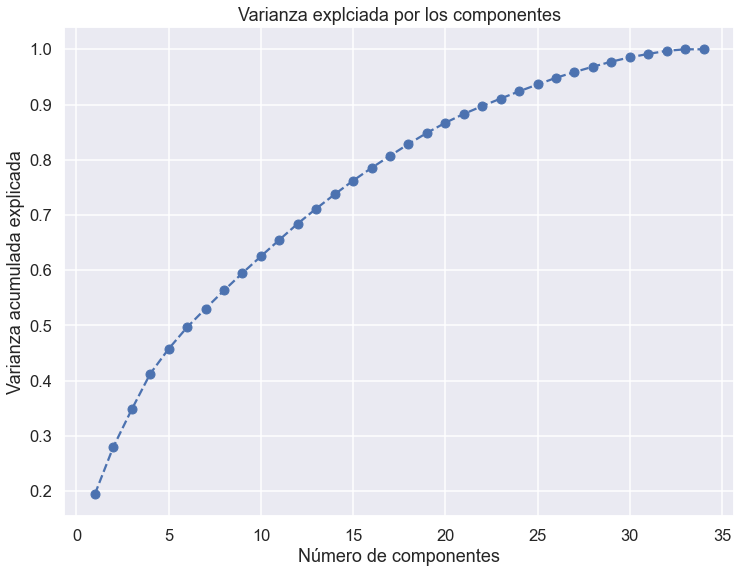

In [89]:
#Graficamos los componentes para ver cuando sumen el 80%
plt.figure (figsize = (12,9))
plt.plot(range(1,35), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ("Varianza explciada por los componentes")
plt.xlabel ('Número de componentes')
plt.ylabel ('Varianza acumulada explicada')

In [93]:
#Vemos con cuantos componentes alcanzamos el 80% de la explicación de la varianza.
#Parece que con 17componentes se alcanza

#Revisamos para comprobar
sum(pca2.explained_variance_ratio_[:17])


0.8070986698440021

In [94]:
#Entrenamos el modelo con los 17 componentes que nos indicó previamente
pca2 = PCA(n_components = 17)
pca2.fit(data_norm2)

PCA(n_components=17)

In [96]:
#Transformamos el dataframe
data_transform2 = pca2.transform(data_norm2)

In [97]:
#Creamos un dataframe para ver nuevamente la información con los 17 componentes
data_pca2 = pd.DataFrame(data_transform2, index = data_norm2.index, columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12', 'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17'])
data_pca2.head()

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7,Componente 8,Componente 9,Componente 10,Componente 11,Componente 12,Componente 13,Componente 14,Componente 15,Componente 16,Componente 17
0,1.171643,-1.333884,-0.848689,-1.840590,-0.715390,0.496972,-0.729979,-0.822150,-0.262544,1.195869,-0.611555,0.417403,-0.200410,0.299100,0.707563,-0.677749,1.143404
1,0.572243,1.468151,0.011671,-0.024449,-0.243066,-0.128098,-1.265666,0.889194,-0.460775,-1.341411,0.985781,-0.167691,-0.402696,-0.923447,0.113575,0.332899,-1.328647
2,1.447591,-0.925577,-0.908678,-1.668815,-0.180636,1.171136,-0.312810,-0.629636,-0.434392,1.230190,-0.435505,0.111870,0.267952,0.411036,0.441642,-0.215773,0.745609
3,-1.380782,-1.202583,1.065179,-0.855784,0.449665,-0.587573,0.323510,-0.928640,-0.776121,-0.205269,-1.456597,2.447453,0.307076,0.971039,1.126359,0.479545,-0.529214
4,3.645644,-1.554852,0.725958,-1.947222,-0.392496,0.752779,-1.104244,-0.471902,-0.042648,0.147643,-0.223259,0.569247,0.071334,0.225642,-0.108709,-0.579970,-0.031627


In [99]:
#Nos quedamos con nuestro modelo final de 17 componentes, con sus respectivos coeficientes
pca2.explained_variance_ratio_[:17]

#Cada uno de los valores de las casas, va a estar dado por multiplicar el coeficiente de cada componente
#por el valor que tiene cada casa en ese componente

array([0.19459417, 0.08530519, 0.06813853, 0.06443344, 0.04514615,
       0.03903097, 0.0338945 , 0.03279478, 0.03145214, 0.03033506,
       0.02987839, 0.02942302, 0.02714128, 0.02582222, 0.02479368,
       0.02301801, 0.02188826])